# Fraud Detection

## Import Packages

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import Pipeline
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import average_precision_score,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ft=pd.read_csv('drive/My Drive/Training/fraud detection/fraud train.csv')
ft.drop(columns='ID',inplace=True)

In [ ]:
print('Total each class:\n',ft['Class'].value_counts())
print('\nPercentage of each class:\n',ft['Class'].value_counts()/len(ft))

Total each class:
 0    197982
1       383
Name: Class, dtype: int64

Percentage of each class:
 0    0.998069
1    0.001931
Name: Class, dtype: float64


In [ ]:
ft.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
ft1 = ft.copy()

In [ ]:
ft1.drop_duplicates(inplace=True)

In [ ]:
print('Total each class after drop duplicates:\n',ft1['Class'].value_counts())
print('\nPercentage of each class:\n',ft1['Class'].value_counts()/len(ft1))

Total each class after drop duplicates:
 0    197288
1       365
Name: Class, dtype: int64

Percentage of each class:
 0    0.998153
1    0.001847
Name: Class, dtype: float64


In [ ]:
ft1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198360,132457.0,-0.474163,1.438815,-0.816746,0.786791,1.067826,-0.207767,1.251817,0.140304,-0.903642,...,0.125517,0.527323,-0.272449,-1.027952,0.237013,-0.312190,0.304261,0.170698,54.21,0
198361,132457.0,1.501100,-2.329402,-0.028328,-0.579340,-2.269449,-0.208058,-1.307538,0.083778,0.774633,...,-0.006746,-0.112426,0.103570,-0.060057,-0.973943,1.226613,-0.080066,0.009990,314.90,0
198362,132458.0,1.957960,-0.677669,-0.395253,0.762448,-0.685747,0.201289,-0.854448,0.198542,1.820618,...,0.199416,0.907851,0.061666,0.730593,0.001207,0.568559,-0.009303,-0.047854,14.39,0
198363,132458.0,-1.135983,-2.150924,-1.078870,-0.922886,-1.936992,0.819695,3.101553,-0.311864,-1.447371,...,0.522862,0.629329,1.597087,-0.658563,0.298377,-0.101644,-0.198980,0.084730,804.00,0


## Data Preparation

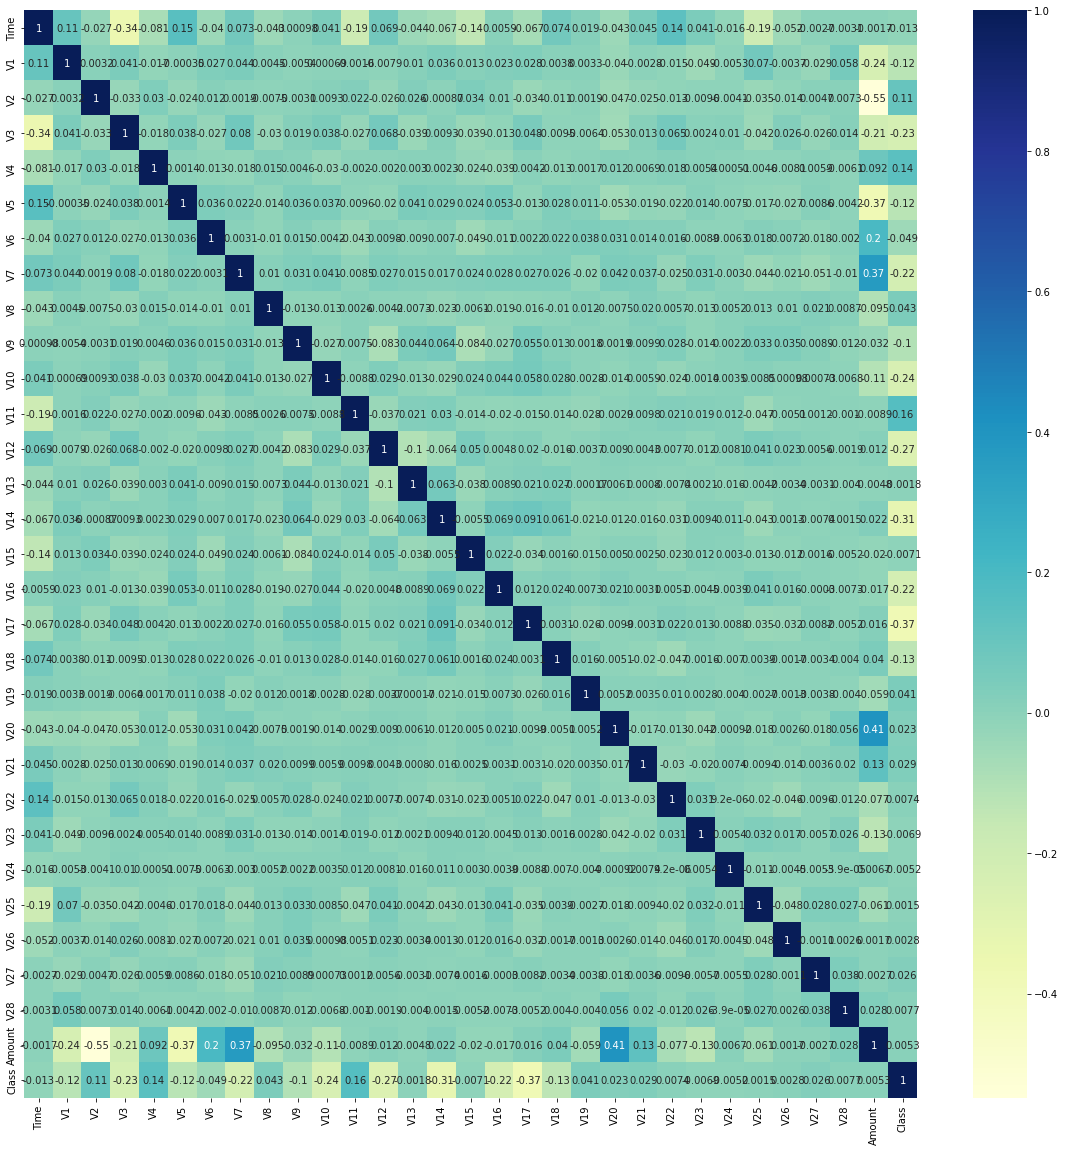

In [ ]:
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(ft1.corr(), cmap="YlGnBu", annot=True)

In [ ]:
new_ft = ft1[['V1','V2','V3','V4','V5','V7','V9','V10','V11','V12','V14','V16','V17','V18','Time','Amount','Class']]

In [ ]:
new_ft.shape

(197653, 17)

### Split Data

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None,shuffle=False)

X = new_ft.drop(columns='Class')
y = new_ft['Class']

for train_index, test_index in skf.split(X,y):
    print('Train:', train_index, 'Test:', test_index)
    X_trainOri, X_testOri = X.iloc[train_index], X.iloc[test_index]
    y_trainOri, y_testOri = y.iloc[train_index], y.iloc[test_index]

Train: [ 16360  16725  16808 ... 197650 197651 197652] Test: [    0     1     2 ... 39559 39560 39561]
Train: [     0      1      2 ... 197650 197651 197652] Test: [16360 16725 16808 ... 79104 79105 79106]
Train: [     0      1      2 ... 197650 197651 197652] Test: [ 47594  47884  49991 ... 118611 118612 118613]
Train: [     0      1      2 ... 197650 197651 197652] Test: [ 95972  96420  96625 ... 158166 158167 158168]
Train: [     0      1      2 ... 158166 158167 158168] Test: [150089 150097 150098 ... 197650 197651 197652]


In [ ]:
y_testOri.value_counts()/len(y_testOri)

0    0.998153
1    0.001847
Name: Class, dtype: float64

### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_trainOriscaled = ss.fit_transform(X_trainOri)
X_testOriscaled = ss.transform(X_testOri)
X_trainOriscaled

array([[-0.63360335, -0.07313073,  1.48867867, ...,  0.09539697,
        -2.36248852,  0.25080473],
       [ 0.77038836,  0.13800963, -0.32246912, ..., -0.15648013,
        -2.36248852, -0.34598734],
       [-0.63280383, -0.86265657,  0.90545825, ..., -0.0818125 ,
        -2.36244696,  1.18110661],
       ...,
       [-0.92408523, -1.80935694,  0.82930828, ...,  0.62541385,
         2.28162411, -0.30248606],
       [ 1.23624089,  0.2742173 , -2.40608603, ...,  2.46222947,
         2.28162411, -0.35285169],
       [ 0.28162059,  0.59273942, -1.3453394 , ...,  0.74121221,
         2.28162411, -0.23595469]])

In [ ]:
def eval(model):
    y_pred = model.predict(X_testOriscaled)
    y_score = model.decision_function(X_testOriscaled)

    from sklearn.metrics import average_precision_score,classification_report
    print('AP Score (Test): '+ str(average_precision_score(y_testOri, y_score)))
    print('---Classification Report---\n'+str(classification_report(y_testOri, y_pred)))

## Model

### Baseline (No Oversampling)

In [ ]:
log_param = {'penalty': ['l2'], 'C':[0.01,0.1,1,10], 'max_iter':[400,600,1000]}
lr= LogisticRegression()
baseline = RandomizedSearchCV(lr, param_distributions=log_param,cv=5,scoring='recall')
baseline.fit(X_trainOriscaled,y_trainOri)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [400, 600, 1000],
                                        'penalty': ['l2']},
                   scoring='recall')

In [ ]:
print('\n The best estimator:\n', baseline.best_estimator_)
print('\n The best score: \n', baseline.best_score_)
print('\n The best Params: \n', baseline.best_params_)


 The best estimator:
 LogisticRegression(C=10, max_iter=1000)

 The best score: 
 0.5036236119228521

 The best Params: 
 {'penalty': 'l2', 'max_iter': 1000, 'C': 10}


In [ ]:
eval(baseline)

AP Score (Test): 0.7212063421968006
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39457
           1       0.75      0.64      0.69        73

    accuracy                           1.00     39530
   macro avg       0.87      0.82      0.85     39530
weighted avg       1.00      1.00      1.00     39530



### Logistic Regression (Wrong way Oversampling)

In [ ]:
X_train_up, y_train_up = SMOTE(random_state=42).fit_resample(X_trainOriscaled,y_trainOri)
y_train_up.mean()

0.5

In [ ]:
log_param = {'penalty': ['l2'], 'C':[0.01,0.1,1,10], 'max_iter':[200,400,600,1000]}
random_naive = RandomizedSearchCV(lr,param_distributions=log_param,cv=5,scoring='recall')
random_naive.fit(X_train_up, y_train_up)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'max_iter': [200, 400, 600, 1000],
                                        'penalty': ['l2']},
                   scoring='recall')

In [ ]:
print('\n The best estimator:\n', random_naive.best_estimator_)
print('\n The best score: \n', random_naive.best_score_)
print('\n The best Params: \n', random_naive.best_params_)


 The best estimator:
 LogisticRegression(C=10, max_iter=600)

 The best score: 
 0.9052340741760277

 The best Params: 
 {'penalty': 'l2', 'max_iter': 600, 'C': 10}


In [ ]:
best_est_naive = random_naive.best_estimator_
eval(best_est_naive)

AP Score (Test): 0.7753211726888084
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     39457
           1       0.04      0.92      0.07        73

    accuracy                           0.95     39530
   macro avg       0.52      0.94      0.52     39530
weighted avg       1.00      0.95      0.97     39530



### Logistic Regression with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
sm =  SMOTE(random_state=42)
lr = LogisticRegression(random_state=42)
log_param = {'penalty': ['l2'], 'C':[0.01,0.1,1,10], 'max_iter':[400,600,1000]}


pipeline = Pipeline([('sampling',sm),('logisticregression',lr)])
param = {'logisticregression__' + key: log_param[key] for key in log_param}
randomcv = RandomizedSearchCV(pipeline, param_distributions=param, scoring='recall', cv=skf, n_iter=10, return_train_score=True, error_score='raise')
randomcv.fit(X_trainOriscaled,y_trainOri)
best_est = randomcv.best_estimator_

In [ ]:
print('\n The best estimator:\n', randomcv.best_estimator_)
print('\n The best score: \n', randomcv.best_score_)
print('\n The best Params: \n', randomcv.best_params_)


 The best estimator:
 Pipeline(steps=[('sampling', SMOTE(random_state=42)),
                ('logisticregression',
                 LogisticRegression(C=1, max_iter=400, random_state=42))])

 The best score: 
 0.8977206312098188

 The best Params: 
 {'logisticregression__penalty': 'l2', 'logisticregression__max_iter': 400, 'logisticregression__C': 1}


In [ ]:
eval(best_est)

AP Score (Test): 0.7753212186386707
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     39457
           1       0.04      0.92      0.07        73

    accuracy                           0.95     39530
   macro avg       0.52      0.94      0.52     39530
weighted avg       1.00      0.95      0.97     39530



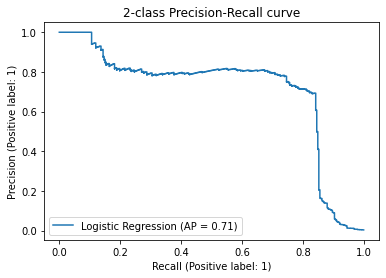

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    randomcv, X_trainOriscaled,y_trainOri, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

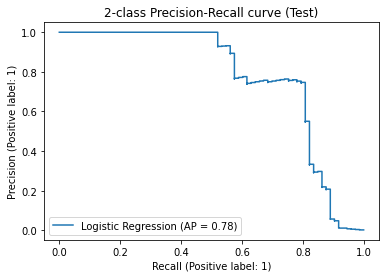

In [ ]:
display = PrecisionRecallDisplay.from_estimator(randomcv, X_testOriscaled,y_testOri, name="Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve (Test)")

### RandomForest with SMOTE

In [ ]:
rf = RandomForestClassifier()
rf_param = {'n_estimators':[1000],'max_depth':[15]}

pipelinerf = Pipeline([('sampling',sm),('randomforest',rf)])
paramrf = {'randomforest__' + key: rf_param[key] for key in rf_param}
randomrf = RandomizedSearchCV(pipelinerf, param_distributions=paramrf, cv=skf, return_train_score=True, error_score='raise')
randomrf.fit(X_trainOriscaled,y_trainOri)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=Pipeline(steps=[('sampling',
                                              SMOTE(random_state=42)),
                                             ('randomforest',
                                              RandomForestClassifier())]),
                   param_distributions={'randomforest__max_depth': [15],
                                        'randomforest__n_estimators': [1000]},
                   return_train_score=True)

In [ ]:
y_pred = randomrf.predict(X_testOriscaled)
y_score = randomrf.predict_proba(X_testOriscaled)

print('AP Score (Test): '+ str(average_precision_score(y_testOri, y_score[:,1])))
print('---Classification Report---\n'+str(classification_report(y_testOri, y_pred)))

AP Score (Test): 0.636406976620959
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39457
           1       0.89      0.23      0.37        73

    accuracy                           1.00     39530
   macro avg       0.95      0.62      0.68     39530
weighted avg       1.00      1.00      1.00     39530



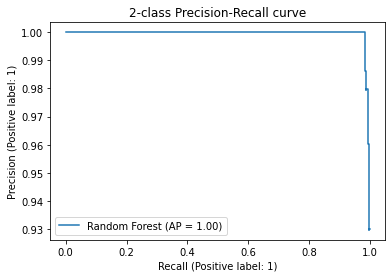

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    randomrf, X_trainOriscaled,y_trainOri, name="Random Forest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

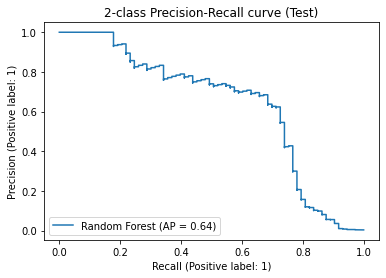

In [ ]:
display = PrecisionRecallDisplay.from_estimator(randomrf, X_testOriscaled,y_testOri, name="Random Forest")
_ = display.ax_.set_title("2-class Precision-Recall curve (Test)")

### DecisionTree with SMOTE

In [ ]:
dt = DecisionTreeClassifier()
dt_param = {'max_depth':[5]}

pipelinedt = Pipeline([('sampling',sm),('dectree',dt)])
paramdt = {'dectree__' + key: dt_param[key] for key in dt_param}
randomdt = RandomizedSearchCV(pipelinedt, param_distributions=paramdt, cv=skf, return_train_score=True, error_score='raise')
randomdt.fit(X_trainOriscaled,y_trainOri)
best_est_dt = randomdt.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
y_pred = randomdt.predict(X_testOriscaled)
y_score = randomdt.predict_proba(X_testOriscaled)

print('AP Score (Test): '+ str(average_precision_score(y_testOri, y_score[:,1])))
print('---Classification Report---\n'+str(classification_report(y_testOri, y_pred)))

AP Score (Test): 0.4499137530561583
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     39457
           1       0.03      0.89      0.06        73

    accuracy                           0.94     39530
   macro avg       0.51      0.92      0.51     39530
weighted avg       1.00      0.94      0.97     39530



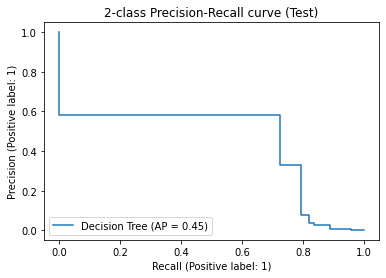

In [ ]:
display = PrecisionRecallDisplay.from_estimator(randomdt, X_testOriscaled,y_testOri, name="Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve (Test)")

### XGboost with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

xgb_param = {'learning_rate':[0.1], 'n_estimators':[500], 'subsample':[1.0]}
skf = StratifiedKFold(n_splits=5, random_state=42,shuffle=True)
sm =  SMOTE(random_state=42)
xgb = GradientBoostingClassifier(random_state=42)


pipelinexgb = Pipeline([('sampling',sm),('xgboost',xgb)])
paramxgb = {'xgboost__' + key: xgb_param[key] for key in xgb_param}
randomxgb = RandomizedSearchCV(pipelinexgb, param_distributions=paramxgb, cv=skf, return_train_score=True, error_score='raise')
modelxgb = randomxgb.fit(X_trainOriscaled,y_trainOri)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
eval(randomxgb)

AP Score (Test): 0.3746646466372561
---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39457
           1       0.40      0.40      0.40        73

    accuracy                           1.00     39530
   macro avg       0.70      0.70      0.70     39530
weighted avg       1.00      1.00      1.00     39530



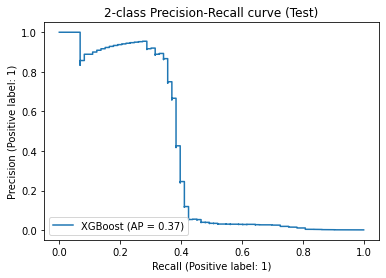

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    randomxgb, X_testOriscaled,y_testOri, name="XGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve (Test)")

## Model Selected

According to AP score of each model have, Logistic Regression with SMOTE have better AP score than the rest of model. So for this session, let's go with Logistic Regression with SMOTE.

For future work, we can tuning our model or adjust the weight of classes to have classifier model with better performance. 

In [ ]:
### Plotting Cumulative Gain Curve for Selected Model (Logistic Regression)
predicted_probas = randomcv.predict_proba(X_testOriscaled)

In [ ]:

!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


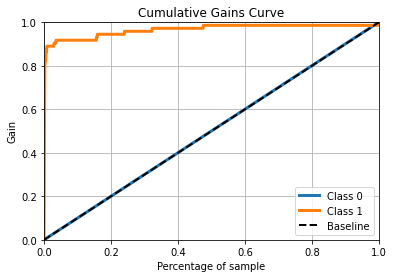

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_testOri, predicted_probas)
plt.show()

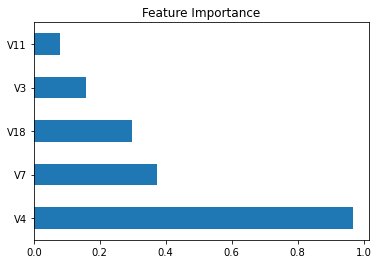

In [ ]:
importance = best_est.steps[1][1].coef_[0]
feat_importance = pd.Series(importance, index = X_testOri.columns)
feat_importance.nlargest(5).plot(kind='barh',title='Feature Importance')